# Deep Q-Network (DQN)
---
In this notebook we create and run and deep Q-learning agent to solve the game Lunar Lander

### 1.Imports

In [1]:
# Basic imports
import gym
import Box2D
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# Set plotting options
%matplotlib inline
plt.style.use('ggplot')
np.set_printoptions(precision=3, linewidth=120)

# Intiailize display
is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [2]:
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


Let's see how an untrained agent behaves:

KeyboardInterrupt: 

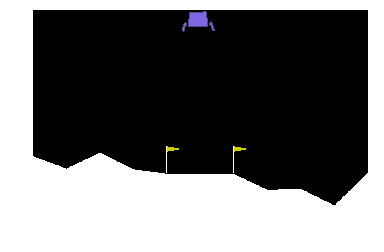

In [3]:
from dqn_agent import Agent

agent = Agent(state_size=8, action_size=4, seed=0)

# watch an untrained agent
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'), aspect='auto')
for j in range(200):
    #action = env.action_space.sample() 
    action = agent.act(state)
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()

### 3. Train the Agent with DQN (SKIP IF ALREADY TRAINED, SEE 4)

DQN agent training

Episode 100	Average Score: -166.87
Episode 200	Average Score: -97.232
Episode 300	Average Score: -42.12
Episode 400	Average Score: -50.63
Episode 500	Average Score: -22.66
Episode 600	Average Score: 48.171
Episode 700	Average Score: 151.89
Episode 800	Average Score: 180.51
Episode 900	Average Score: 175.70
Episode 976	Average Score: 202.26
Environment solved in 876 episodes!	Average Score: 202.26


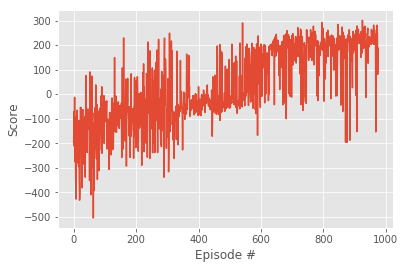

In [4]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    # Train the agent
    for i_episode in range(1, n_episodes+1):
        
        state = env.reset()
        score = 0
        
        for t in range(max_t):
            
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
            
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Visualize the training agent

Let's import the trained agent Q-network's weights and see it in action

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ascfr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-5080589a0530>", line 11, in <module>
    display.display(plt.gcf())
  File "C:\Users\ascfr\Anaconda3\lib\site-packages\IPython\core\display.py", line 304, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "C:\Users\ascfr\Anaconda3\lib\site-packages\IPython\core\formatters.py", line 180, in format
    data = formatter(obj)
  File "<decorator-gen-9>", line 2, in __call__
  File "C:\Users\ascfr\Anaconda3\lib\site-packages\IPython\core\formatters.py", line 224, in catch_format_error
    r = method(self, *args, **kwargs)
  File "C:\Users\ascfr\Anaconda3\lib\site-packages\IPython\core\formatters.py", line 341, in __call__
    return printer(obj)
  File "C:\Users\ascfr\Anaconda3\lib\site-packages\IPython\core\pylabtools.py", line 244

KeyboardInterrupt: 

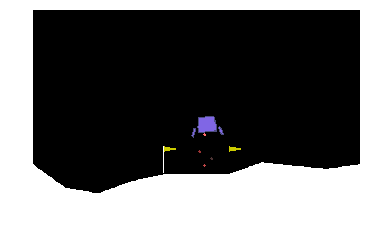

In [5]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(3):
    state = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    for j in range(500):
        action = agent.act(state)
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()

### 5. Further developments

- Explore alternative DQN architectures to solve the environment faster.  
- Extend to alternative environments.
- Explore enhancements (e.g. prioritized experience replay, Double DQN, Dueling DQN)